# Assignment 4 - Natural Language Processing

Class: COMP 5630 - Machine Learning

Author: Chris Hinkson

Email: cmh0201@auburn.edu

***

### Declaration of GenAI Usage

I did use generative AI, primarily ChatGPT, in a limited manner to explore concepts and module syntax. For instance, I used ChatGPT to explore how to build a LSTM with Keras that can support the FastText embedding matrix. Additionally, I used it to quickly look at how to make nicer tables (with tabulate) and plots (with matplotlib). However, any code examples provided were ChatGPT were only used as a reference. All code shown here is mine, although it may be closely based on those examples provided by ChatGPT along with examples found in module documentation.

***

### Notebook Table of Contents

1) [Assignment 4 Report](#assignment-4-report)
2) [Assignment 4 Environment Preparation](#assignment-4-environment-preparation)
	1. [Module Imports](#module-imports)
	2. [Dataset Downloading](#dataset-downloading)
3) [Assignment 4 Part 1: Word Embeddings](#assignment-4-part-1-word-embeddings)
	1. [Setup Provided Words](#setup-provided-words)
	2. [Compute Glove Cosine Similarities](#compute-cosine-similarities-with-glove-embeddings)
	3. [Build FastText Model](#build-fasttext-model)
	4. [Compute FastText Cosine Similarities](#compute-cosine-similarities-with-fasttext)
	5. [Glove vs FastText Model Comparison](#glove-vs-fasttext-model-comparison)
4) [Assignment 4 Part 2: LSTM Comparison](#assignment-4-part-2-lstm)
	1. [Dataset Cleaning](#dataset-cleaning)
	2. [Dataset Split](#dataset-split)
	3. [Tokenization](#tokenization)
	4. [Sequence Padding](#sequence-padding)
	5. [Label Encoding](#label-encoding)
	6. [Hyperparameter Definition](#hyperparameter-definition)
	7. [Baseline LSTM Creation](#baseline-lstm)
	8. [FastText LSTM Creation](#fasttext-lstm)
	9. [LSTM Results and Comparison](#lstm-comparison)
	
***

## Assignment 4 Report

### Part 1 Report: Word Embeddings

For part 1, the main goal was to determine if one embedding method captured semantic relations between words better than the other. To do this, I built the following table to display the calculated similarity under the two embedding methods (glove embeddings vs fasttext embeddings) for each word-pair:

| Word Pair     |   Glove Similarity |   FastText Similarity |   Difference |
|---------------|--------------------|-----------------------|--------------|
| dog - dog     |             1      |                1      |       0      |
| dog - bark    |             0.5938 |                0.1078 |       0.4859 |
| dog - tree    |             0.7138 |               -0.17   |       0.5438 |
| dog - bank    |             0.3482 |                0.0313 |       0.3169 |
| dog - river   |             0.4012 |               -0.0135 |       0.3877 |
| dog - money   |             0.5751 |               -0.1112 |       0.4639 |
| bark - bark   |             1      |                1      |       0      |
| bark - tree   |             0.5459 |                0.2076 |       0.3383 |
| bark - bank   |             0.0401 |                0.1696 |      -0.1295 |
| bark - river  |             0.2666 |                0.0867 |       0.18   |
| bark - money  |             0.291  |               -0.0468 |       0.2442 |
| tree - tree   |             1      |                1      |       0      |
| tree - bank   |             0.3495 |                0.0357 |       0.3138 |
| tree - river  |             0.4871 |                0.0653 |       0.4219 |
| tree - money  |             0.5101 |               -0.2631 |       0.247  |
| bank - bank   |             1      |                1      |       0      |
| bank - river  |             0.3199 |                0.2033 |       0.1166 |
| bank - money  |             0.6747 |               -0.0164 |       0.6582 |
| river - river |             1      |                1      |       0      |
| river - money |             0.3378 |               -0.1227 |       0.2151 |
| money - money |             1      |                1      |      -0      |

Initially, a quick skim of the table confirms at least that both embeddings were performed correctly, indicated by both embedding models giving a similarity of 1 (meaning exactly the same) for pairs formed with two of the same word (such as dog-dog). Looking closer, we can see that the two models are not directly comperable in the shown units, as their similarity scores are based on different scales (as can be assumed prior to obtaining this table). However, by examining for each embedding model whether similar word pairs and different word pairs are scored highly or lowly, respectively, for each model, we can find that:

- Glove overall appears to do a decent job at identifying semantically-related words. For instance, for "dog-bark", it gave it a relatively moderate-to-high similarity score. The same can be seen for the pair "bark-tree", which also got a moderate similarity score. However, it does appear to draw some semantic relationships that are not rea; for "dog-tree", it gave a similarity score of 0.7138, which is the highest similarity score given to any pair even though the two words are not semantically related (unless it was highly trained on [Dogwood](https://en.wikipedia.org/wiki/Cornus) trees, which is presumably not likely). For the most part, though, Glove appears to do an okay job, giving higher scores to related words and giving lower scores to not-related words, minus a few exceptions. 
- Fasttext, on the other hand, does not really appear to capture much semantic meaning. Across the board, it overall does not give much indication of similarity, and even gives negative similarity for closely-related words. It does seem to give some higher scores for some pairs, such as bark-tree and bank-river, but fails to equally "spread out" the similarity scores as one would expect and as was observed with Glove. 

Overall, these findings point to **Glove being the better embedding model** in this case. While not achieving perfect performance, it appears to better show the trend in related-ness for different word pairs.


### Part 2 Report: LSTM Comparison

To compare the results for the two LSTM models, being the baseline LSTM and the fasttext LSTM, I present another table that displays all results for both models across a variety of hyperparameters and metrics:

| LSTM Type     |   Number Epochs |   Dropout Rate |   Training Accuracy |   Validation Accuracy |   Test Accuracy |   Training Loss |   Validation Loss |   Test Loss |
|---------------|-----------------|----------------|---------------------|-----------------------|-----------------|-----------------|-------------------|-------------|
| Baseline LSTM |               3 |            0.2 |              0.2997 |                0.2482 |          0.2598 |          2.3578 |            2.5579 |      2.5626 |
| FastText LSTM |               3 |            0.2 |              0.204  |                0.2013 |          0.2122 |          2.7432 |            2.7492 |      2.7419 |
| Baseline LSTM |               3 |            0.3 |              0.2959 |                0.2538 |          0.27   |          2.3761 |            2.5624 |      2.5471 |
| FastText LSTM |               3 |            0.3 |              0.204  |                0.2013 |          0.2122 |          2.7433 |            2.7479 |      2.7382 |
| Baseline LSTM |               3 |            0.5 |              0.286  |                0.2518 |          0.268  |          2.4247 |            2.537  |      2.5224 |
| FastText LSTM |               3 |            0.5 |              0.204  |                0.2013 |          0.2122 |          2.7432 |            2.7492 |      2.7416 |
| Baseline LSTM |               5 |            0.2 |              0.3825 |                0.2518 |          0.2584 |          2.0567 |            2.6665 |      2.6755 |
| FastText LSTM |               5 |            0.2 |              0.204  |                0.2013 |          0.2122 |          2.7422 |            2.7477 |      2.7384 |
| Baseline LSTM |               5 |            0.3 |              0.3562 |                0.2496 |          0.2616 |          2.1381 |            2.6264 |      2.6089 |
| FastText LSTM |               5 |            0.3 |              0.204  |                0.2013 |          0.2122 |          2.7429 |            2.7471 |      2.7368 |
| Baseline LSTM |               5 |            0.5 |              0.3274 |                0.2587 |          0.2696 |          2.2413 |            2.5615 |      2.5502 |
| FastText LSTM |               5 |            0.5 |              0.204  |                0.2013 |          0.2122 |          2.7423 |            2.7474 |      2.7382 |
| Baseline LSTM |              10 |            0.2 |              0.5731 |                0.2382 |          0.2424 |          1.4614 |            3.0994 |      3.1466 |
| FastText LSTM |              10 |            0.2 |              0.204  |                0.2013 |          0.2122 |          2.7418 |            2.7463 |      2.7383 |
| Baseline LSTM |              10 |            0.3 |              0.529  |                0.2451 |          0.2436 |          1.5908 |            2.9722 |      2.9994 |
| FastText LSTM |              10 |            0.3 |              0.204  |                0.2013 |          0.2122 |          2.7417 |            2.746  |      2.7376 |
| Baseline LSTM |              10 |            0.5 |              0.438  |                0.256  |          0.2558 |          1.8878 |            2.7081 |      2.7293 |
| FastText LSTM |              10 |            0.5 |              0.204  |                0.2013 |          0.2122 |          2.7417 |            2.7457 |      2.7377 |

While this table does provide a lot of data, looking closer, we can answer a few key questions proposed in the assignment instructions. Additionally, to help answer these questions, I also created the following two figures to display the results visually:

<a href="https://drive.google.com/drive-viewer/AKGpihayXY_OklZONsY-Ub3krh59Pgu_AMUdaiA_rB5mf0xr-B0t3SylRNgadwnR1CeGgjJojRFGUuT5MrbyoDeQCyOwsYg10sgNZt0=s1600-rw-v1?source=screenshot.guru"> <img src="https://drive.google.com/drive-viewer/AKGpihayXY_OklZONsY-Ub3krh59Pgu_AMUdaiA_rB5mf0xr-B0t3SylRNgadwnR1CeGgjJojRFGUuT5MrbyoDeQCyOwsYg10sgNZt0=s1600-rw-v1" /> </a>

<a href="https://drive.google.com/drive-viewer/AKGpiha4a0q47DMWMRyprHpGfyuAHfVdtqj8qtTcFz_c3KWRooj4uqFknKcM7iN7NRHqUShwUdSBEbw1yBWDD9ORKzQN5igWy73BGw=s1600-rw-v1?source=screenshot.guru"> <img src="https://drive.google.com/drive-viewer/AKGpiha4a0q47DMWMRyprHpGfyuAHfVdtqj8qtTcFz_c3KWRooj4uqFknKcM7iN7NRHqUShwUdSBEbw1yBWDD9ORKzQN5igWy73BGw=s1600-rw-v1" /> </a>

Starting with identifying the best hyperparameter combination for each model, we can find that:

- **For the Baseline LSTM model, a dropout rate of 0.2 with 10 epochs appears the best** in the only significantly-differing metrics, training accuracy and training loss. for the validation and test performance, no variation produces differing-enough results to make claims about superior hyperparameters. Based on training accuracy and loss alone, though, would support a dropout rate of 0.2 and epochs amount of 10.
- **For the FastText LSTM model, there was not a discenrable difference in any metric for hyperparameter tuning** across training, validation, or test sets. Looking at the raw values for each metric, we see that, in most cases, the model actually resulted in the same achievement across hyperparemets. The largest (but still extremely small) difference can be found in test performance, where results are expected to very the most. This indicates that the FastText model likely did not have enough capacity to learn anything useful and is just a poor choice of model.

Based on these findings, I would claim that the **Baseline LSTM embeddings work the best**. Overall, its accuracy was higher across the board and loss lower across the board for all training, validation, and test sets. While not that *significantly* much better, it still achieved higher enough performance to be the better model.

**Hyperparameters do appear to affect performance during training, but not during validation or test**. In the above graphs, although there is not much difference for the validation and test performance, training accuracy reveals different results. Especially for varying the number of epochs while holding dropout constant, we see that increasing the number of epochs leads to higher training accuracy and lower training loss. Unfortunately, this relationship is much smaller for changing the dropout rate while holding epochs steady. Although there is a slight change, there is not enough evidence in the training, validation, or test performance that changing the dropout rate will produce significantly different results. 

Overall, the results of this LSTM comparison and evaluation show that neither LSTM is particularly suited for this task. While the baseline LSTM did perform somewhat better than the FastText LSTM, and training did show a difference for hyperparameter tuning, none of the achieved results indicate a particular well match for the given dataset. This can be due to a number of reasons:

- Perhaps hyperparameters could be further tuned / tested for the *most* optimal result
- The LSTM may benefit with more architecture for performance
- Other embedding models could be explored
- Performing other operations on the dataset, such as NLP tasks or target redefinition, could produce better results

However, in conclusion, neither LSTM performed exceptionally well. While the Baseline LSTM won at 10 epochs and a dropout rate of 0.2, it did not perform significantly good enough to be classified as well performing.

***

## Assignment 4 Environment Preparation

This section will prepare the environment for the assignment.

Note that the following dependencies are required to run (I attempt to download the ones that gave me issues in Colab):
- [Numpy](https://numpy.org/doc/stable/) for working with numerical data
- [URLExtract](https://pypi.org/project/urlextract/) for extracting URL's during data cleaning
- [Scikit Learn](https://scikit-learn.org/stable/) for the embedding model conversion process
- [Tabulate](https://pypi.org/project/tabulate/) for displaying nice tables
- [TQDM](https://github.com/tqdm/tqdm) for displaying nice progress bars
- [Matplotlib](https://matplotlib.org/) for displaying nice charts
- [TensorFlow](https://www.tensorflow.org/) for building the models
- [HuggingFace's Datasets](https://huggingface.co/docs/datasets/en/installation) for the dataset hosted on Hugging Face
- [FastText](https://pypi.org/project/fasttext/) for obtaining the pre-trained FastText model
- [Gensim](https://pypi.org/project/gensim/) for embedding model loading

### Module Imports

This section will import all of the needed dependencies for this assignment.

In [ ]:
try:
	import google.colab

	# Get the right fasttext
	!git clone https://github.com/facebookresearch/fastText.git
	!pip install fastText/

	# Install stuff for pip
	!pip install urlextract
	!pip install gensim

	print("Running in Google Colab!")
	
except ImportError:
	print("Not running in Colab.")

Not running in Colab.


In [42]:
# System
import os

# Data
import re
import numpy as np
from urlextract import URLExtract
from sklearn.decomposition import PCA

# Display
import tabulate
from tqdm import tqdm
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout #type: ignore
from tensorflow.keras.utils import to_categorical #type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer #type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences #type: ignore

# Hugging Face
import datasets as huggingface_datasets
from datasets.dataset_dict import DatasetDict
from datasets.arrow_dataset import Dataset

# Fasttext
import fasttext

# Gensim setup + imports
gensimLocalDirectory = os.path.join(os.getcwd(), "../data", "gensim-data")
os.environ["GENSIM_DATA_DIR"] = gensimLocalDirectory
from gensim.models import FastText
from gensim.test.utils import common_texts
from gensim import downloader as gensim_api
from gensim.models.keyedvectors import KeyedVectors

### Dataset Downloading

This section will download all of the datasets for this assignment.

In [2]:
# Make sure data directory exists
os.makedirs("../data", exist_ok=True)

In [3]:
# Download the Glove-twitter-50D word embeddings model with gensim
os.makedirs(gensimLocalDirectory, exist_ok=True)
model_gloveTwitter50D: KeyedVectors = gensim_api.load("glove-twitter-50")
print(f"Loaded the Glove-twitter-50D model!")
print(f" -> Data Type: {type(model_gloveTwitter50D)}")
print(f" -> Number of Vectors: {len(model_gloveTwitter50D.index_to_key)}")
print(f" -> Vector Dimension: {model_gloveTwitter50D.vector_size}")

Loaded the Glove-twitter-50D model!
 -> Data Type: <class 'gensim.models.keyedvectors.KeyedVectors'>
 -> Number of Vectors: 1193514
 -> Vector Dimension: 50


In [4]:
# Download the tweet_eval dataset from Hugging Face
dataset_tweetEval: DatasetDict = huggingface_datasets.load_dataset("cardiffnlp/tweet_eval", "emoji")
dataset_tweetEval: Dataset = dataset_tweetEval['train']
print(f"Loaded the tweet_eval dataset!")
print(f" -> Data Type: {type(dataset_tweetEval)}")
print(f" -> Number of Examples in Training Set: {len(dataset_tweetEval)}")

Loaded the tweet_eval dataset!
 -> Data Type: <class 'datasets.arrow_dataset.Dataset'>
 -> Number of Examples in Training Set: 45000


In [ ]:
# Load the FastText word embeddings model with fasttext / kaggle as backup
try:
	fasttext.util.download_model('en', if_exists='ignore')
	model_fastText_pretrained300D = fasttext.load_model('cc.en.300.bin')
except Exception as e:
	print(f"It appears that FastText is on the wrong version! Trying to download from KaggleHub instead!")
	import kagglehub
	fasttextPath = kagglehub.dataset_download("yekenot/fasttext-crawl-300d-2m")
	model_fastText_pretrained300D = KeyedVectors.load_word2vec_format(
    os.path.join(fasttextPath, "crawl-300d-2M.vec"),
    binary=False,
	)

# Convert to 50D
pca = PCA(n_components=50)
vectors_fastText_pretrained50D = pca.fit_transform(model_fastText_pretrained300D.get_output_matrix())

# Get embeddings for each word
model_fastText_pretrained50D = {word: vectors_fastText_pretrained50D[i] for i, word in enumerate(model_fastText_pretrained300D.get_words())} 

print(f"Loaded the FastText model!")
print(f" -> 300D Data Type: {type(model_fastText_pretrained300D)}")
print(f" -> 300D Number of Vectors: {len(model_fastText_pretrained300D.get_words())}")
print(f" -> 300D Vector Dimension: {model_fastText_pretrained300D.get_dimension()}")
print(f" -> 50D Data Type: {type(vectors_fastText_pretrained50D)}")
print(f" -> 50D Shape: {vectors_fastText_pretrained50D.shape}")
print(f" -> 50D Vector Dimension: {vectors_fastText_pretrained50D.shape[1]}")

/Users/chrishinkson/Programming/COMP5630 - Machine Learning/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:646: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


Loaded the FastText model!
 -> 300D Data Type: <class 'fasttext.FastText._FastText'>
 -> 300D Number of Vectors: 2000000
 -> 300D Vector Dimension: 300
 -> 50D Data Type: <class 'numpy.ndarray'>
 -> 50D Shape: (2000000, 50)
 -> 50D Vector Dimension: 50


***
## Assignment 4 Part 1: Word Embeddings

This section will complete part 1 of the assignment where we examine and work with word embeddings.
***

### Setup Provided Words

This section will provide setup for the provided list of words in the assignment.

In [5]:
part1_givenWords = ["Dog", "Bark", "Tree", "Bank", "River", "Money"]
part1_givenWords_lower = [word.lower() for word in part1_givenWords]

### Compute Cosine Similarities with Glove Embeddings

This section will compute cosine similarities for the words with the Glove model.

In [6]:
# Initialize the similarity matrix
part1_givenWords_similarityMatrix_glove = np.zeros((len(part1_givenWords_lower), len(part1_givenWords_lower)))

# Compute cosine similarities using the embeddings from glove for each word
for rowNum, rowWord in enumerate(part1_givenWords_lower):
	for colNum, colWord in enumerate(part1_givenWords_lower):
		part1_givenWords_similarityMatrix_glove[rowNum, colNum] = model_gloveTwitter50D.similarity(w1=rowWord, w2=colWord)

# Print the similarity matrix
print(f"Cosine Similarity Matrix for Given Words with Glove:")
print(f"{part1_givenWords_similarityMatrix_glove}")

Cosine Similarity Matrix for Given Words with Glove:
[[1.00000012 0.59377944 0.71375078 0.34823632 0.40120089 0.57513344]
 [0.59377944 1.         0.54587328 0.04010864 0.26663467 0.29098499]
 [0.71375078 0.54587328 1.00000012 0.34945631 0.48711583 0.51008117]
 [0.34823632 0.04010864 0.34945631 1.         0.31992203 0.67465627]
 [0.40120089 0.26663467 0.48711583 0.31992203 1.         0.33779967]
 [0.57513344 0.29098499 0.51008117 0.67465627 0.33779967 0.99999994]]


### Build FastText Model

This section will build a model using the common words with FastText.

In [7]:
model_fastText: FastText = FastText(vector_size=50,
									window=5, 
									min_count=1,
									sentences=common_texts,
									epochs=10
)

### Compute Cosine Similarities with FastText

This section will compute cosine similarities for the words with the FastText model.

In [8]:
# Initialize the similarity matrix
part1_givenWords_similarityMatrix_fasttext = np.zeros((len(part1_givenWords_lower), len(part1_givenWords_lower)))

# Compute cosine similarities using the embeddings from fasttext for each word
for rowNum, rowWord in enumerate(part1_givenWords_lower):
	for colNum, colWord in enumerate(part1_givenWords_lower):
		part1_givenWords_similarityMatrix_fasttext[rowNum, colNum] = model_fastText.wv.similarity(w1=rowWord, w2=colWord)

# Print the similarity matrix
print(f"Cosine Similarity Matrix for Given Words with FastText:")
print(f"{part1_givenWords_similarityMatrix_fasttext}")

Cosine Similarity Matrix for Given Words with FastText:
[[ 1.00000012  0.10783225 -0.16999218  0.03131566 -0.01349628 -0.11124045]
 [ 0.10783225  1.          0.2075648   0.16962695  0.08665437 -0.0467676 ]
 [-0.16999218  0.2075648   1.          0.03565013  0.065254   -0.26308936]
 [ 0.03131566  0.16962695  0.03565013  1.          0.20329523 -0.01642046]
 [-0.01349628  0.08665437  0.065254    0.20329523  1.         -0.1226504 ]
 [-0.11124045 -0.0467676  -0.26308936 -0.01642046 -0.1226504   1.        ]]


### Glove vs FastText Model Comparison

This section will compare the two similarity matrices to determine differences in the results. 

In [9]:
# Build table headers
part1_tableHeaders = ["Word Pair", "Glove Similarity", "FastText Similarity", "Difference"]
part1_tableRows = []

# Build rows
visitedWordPairs = []
for rowNum, rowWord in enumerate(part1_givenWords_lower):
	for colNum, colWord in enumerate(part1_givenWords_lower):

		# Avoid duplicate pairs by adding both orders to visited list
		if (rowWord, colWord) in visitedWordPairs:
			continue
		visitedWordPairs.append((rowWord, colWord))
		visitedWordPairs.append((colWord, rowWord))

		# Get embeddings
		gloveEmbedding = part1_givenWords_similarityMatrix_glove[rowNum, colNum]
		fastTextEmbedding = part1_givenWords_similarityMatrix_fasttext[rowNum, colNum]

		# Compute difference between embeddings
		diffSim = np.abs(gloveEmbedding) - np.abs(fastTextEmbedding)
		part1_tableRows.append([f"{rowWord} - {colWord}", f"{gloveEmbedding:.4f}", f"{fastTextEmbedding:.4f}", f"{diffSim:.4f}"])

# Print the comparison table
print("\nGlove vs FastText Similarity Comparison Table:")
print(tabulate.tabulate(part1_tableRows, headers=part1_tableHeaders, tablefmt="github"))


Glove vs FastText Similarity Comparison Table:
| Word Pair     |   Glove Similarity |   FastText Similarity |   Difference |
|---------------|--------------------|-----------------------|--------------|
| dog - dog     |             1      |                1      |       0      |
| dog - bark    |             0.5938 |                0.1078 |       0.4859 |
| dog - tree    |             0.7138 |               -0.17   |       0.5438 |
| dog - bank    |             0.3482 |                0.0313 |       0.3169 |
| dog - river   |             0.4012 |               -0.0135 |       0.3877 |
| dog - money   |             0.5751 |               -0.1112 |       0.4639 |
| bark - bark   |             1      |                1      |       0      |
| bark - tree   |             0.5459 |                0.2076 |       0.3383 |
| bark - bank   |             0.0401 |                0.1696 |      -0.1295 |
| bark - river  |             0.2666 |                0.0867 |       0.18   |
| bark - money  

***
## Assignment 4 Part 2: LSTM

This section will complete part 2 of the assignment where we train a LSTM to predict emojis based on tweets.
***

### Dataset Cleaning

This section will clean the tweets dataset for use in the LSTM.

In [10]:
# Create a URL Extractor for finding URL's in tweets
urlExtractor = URLExtract()

# Create re patterns for mentions, hash tags, and special characters
mentionPattern = r"@\w+"
hashTagPattern = r"#\w+"
specialCharPattern = r"[^a-zA-Z0-9_ ]"

# Make function for cleaning tweets
def cleanTweet(tweet):

	# Get the text from the tweet
	tweetText = tweet["text"]

	# Remove URL's
	urlsFound = urlExtractor.find_urls(tweetText)
	for url in urlsFound:
		tweetText = tweetText.replace(url, "")

	# Remove mentions
	tweetText = re.sub(mentionPattern, "", tweetText)

	# Remove hash tags
	tweetText = re.sub(hashTagPattern, "", tweetText)

	# Remove special characters
	tweetText = re.sub(specialCharPattern, "", tweetText)

	# Remove extra whitespace
	tweetText = tweetText.strip()

	# Return updated tweet
	return {"text": tweetText}

# Apply cleaning function to the dataset
dataset_tweetEval_cleaned: Dataset = dataset_tweetEval.map(cleanTweet)

Map: 100%|██████████| 45000/45000 [00:15<00:00, 2823.03 examples/s]


### Dataset Split

This section will split the data into training, validation, and test sets.

In [11]:
# Initial split into train and test sets
dataset_tweetEval_split1 = dataset_tweetEval_cleaned.train_test_split(test_size=0.2, seed=2002)
dataset_tweetEval_split2 = dataset_tweetEval_split1['test'].train_test_split(test_size=0.5, seed=2002)

# Rename sets for clarity
dataset_tweetEval_train = dataset_tweetEval_split1['train']
dataset_tweetEval_validation = dataset_tweetEval_split2['train']
dataset_tweetEval_test = dataset_tweetEval_split2['test']

# Print sizes for each set
print(f"Dataset Split Sizes:")
print(f"Train: {len(dataset_tweetEval_train)}")
print(f"Validation: {len(dataset_tweetEval_validation)}")
print(f"Test: {len(dataset_tweetEval_test)}")

Dataset Split Sizes:
Train: 36000
Validation: 4500
Test: 4500


### Tokenization

This section will tokenize the sequences.

In [12]:
# Initialize tokenizer
tokenizer = Tokenizer(
	num_words=20000, 
	oov_token="<OOV>",
	lower=True
)

# Fit on training data
tokenizer.fit_on_texts(dataset_tweetEval_train['text'])

# Convert texts to int sequences with tokenizer
sequences_train = tokenizer.texts_to_sequences(dataset_tweetEval_train['text'])
sequences_validation = tokenizer.texts_to_sequences(dataset_tweetEval_validation['text'])
sequences_test = tokenizer.texts_to_sequences(dataset_tweetEval_test['text'])

# Print sizes of sequences for validation
print(f"Tokenized Sequence Sizes:")
print(f" -> Training Set: {len(sequences_train)} sequences")
print(f" -> Validation Set: {len(sequences_validation)} sequences")
print(f" -> Test Set: {len(sequences_test)} sequences")

Tokenized Sequence Sizes:
 -> Training Set: 36000 sequences
 -> Validation Set: 4500 sequences
 -> Test Set: 4500 sequences


### Sequence Padding

This section will pad all sequences to ensure consistent dimensions.

In [13]:
# Figure out the 99th percent length
allSequenceLengths = [len(seq) for seq in sequences_train]
p99Length = int(np.percentile(allSequenceLengths, 99))

# Pad the sequences to the 99th percentile length
sequences_train_padded = pad_sequences(sequences_train, maxlen=p99Length, padding='post', truncating='post')
sequences_validation_padded = pad_sequences(sequences_validation, maxlen=p99Length, padding='post', truncating='post')
sequences_test_padded = pad_sequences(sequences_test, maxlen=p99Length, padding='post', truncating='post')

# Print sizes of padded sequences for validation
print(f"Padded Sequence Sizes (Max Length == {p99Length}):")
print(f" -> Training Set: {sequences_train_padded.shape}")
print(f" -> Validation Set: {sequences_validation_padded.shape}")
print(f" -> Test Set: {sequences_test_padded.shape}")

Padded Sequence Sizes (Max Length == 20):
 -> Training Set: (36000, 20)
 -> Validation Set: (4500, 20)
 -> Test Set: (4500, 20)


### Label Encoding

This section will one-hot encode all of the labels.

In [14]:
# Determine number of classes of emojis
numEmojiClasses = len(set(dataset_tweetEval_train['label']))

# Onehot encode for each set
labels_train_onehot = to_categorical(dataset_tweetEval_train['label'], num_classes=numEmojiClasses)
labels_validation_onehot = to_categorical(dataset_tweetEval_validation['label'], num_classes=numEmojiClasses)
labels_test_onehot = to_categorical(dataset_tweetEval_test['label'], num_classes=numEmojiClasses)

# Print sizes of onehot encoded labels for validation
print(f"One-Hot Encoded Label Sizes:")
print(f" -> Training Set: {labels_train_onehot.shape}")
print(f" -> Validation Set: {labels_validation_onehot.shape}")
print(f" -> Test Set: {labels_test_onehot.shape}")

One-Hot Encoded Label Sizes:
 -> Training Set: (36000, 20)
 -> Validation Set: (4500, 20)
 -> Test Set: (4500, 20)


### Hyperparameter Definition

To compare the two LSTM's, this section will define lists of hyperparameters to try for each.

In [19]:
# Define a list of epochs and dropout rates to try
epochsToTry = [3, 5, 10]
dropoutRatesToTry = [0.2, 0.3, 0.5]

### Baseline LSTM

This section will make and train a baseline LSTM.

In [ ]:
def buildBaselineLstm(vocabSize: int, outputLength: int, dropoutRate: float, numClasses: int, lstmUnits: int) -> tf.keras.Model:

	# Build lstm model with given parameters
	model = tf.keras.Sequential([
		Embedding(
			input_dim=vocabSize,
			output_dim=outputLength,
			trainable=True
		),

		LSTM(
			units=lstmUnits,
			dropout=dropoutRate,
		),

		Dense(
			units=numClasses,
			activation='softmax'
		)
	])

	# Compile the model
	model.compile(
		loss='categorical_crossentropy',
		optimizer='adam',
		metrics=['accuracy']
	)

	# Return the built model
	return model

In [20]:
# Create dict for storing results
baselineLstmResultsDict = {
	epoch: {
		dropoutRate: {
		} for dropoutRate in dropoutRatesToTry
	} for epoch in epochsToTry
}

# Iterate over possible params for epochs and dropout
for epochs in tqdm(iterable=epochsToTry, desc="Testing Epochs", unit="settings"):
	for dropoutRate in tqdm(iterable=dropoutRatesToTry, desc="-> Testing Dropout Rates", unit="settings"):

		# Build the model
		model_lstm = buildBaselineLstm(
			vocabSize=20000,
			outputLength=50,
			dropoutRate=dropoutRate,
			numClasses=numEmojiClasses,
			lstmUnits=64
		)

		# Train the model
		history = model_lstm.fit(
			x=sequences_train_padded,
			y=labels_train_onehot,
			validation_data=(sequences_validation_padded, labels_validation_onehot),
			epochs=epochs,
			batch_size=32,
			verbose=1
		)

		# Evaluate on test set
		testLoss, testAccuracy = model_lstm.evaluate(
			x=sequences_test_padded,
			y=labels_test_onehot,
			verbose=1
		)

		# Save results
		baselineLstmResultsDict[epochs][dropoutRate]['train'] = {
			'loss': history.history['loss'][-1],
			'accuracy': history.history['accuracy'][-1]
		}
		baselineLstmResultsDict[epochs][dropoutRate]['validation'] = {
			'loss': history.history['val_loss'][-1],
			'accuracy': history.history['val_accuracy'][-1]
		}
		baselineLstmResultsDict[epochs][dropoutRate]['test'] = {
			'loss': testLoss,
			'accuracy': testAccuracy
		}

Testing Epochs:   0%|          | 0/3 [00:00<?, ?settings/s]

Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2131 - loss: 2.6877 - val_accuracy: 0.2333 - val_loss: 2.6007
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.2620 - loss: 2.5067 - val_accuracy: 0.2527 - val_loss: 2.5443
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2997 - loss: 2.3578 - val_accuracy: 0.2482 - val_loss: 2.5579
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2598 - loss: 2.5626


Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2123 - loss: 2.6940 - val_accuracy: 0.2289 - val_loss: 2.6110
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2615 - loss: 2.5152 - val_accuracy: 0.2529 - val_loss: 2.5368
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2959 - loss: 2.3761 - val_accuracy: 0.2538 - val_loss: 2.5624
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2700 - loss: 2.5471


Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2122 - loss: 2.6900 - val_accuracy: 0.2202 - val_loss: 2.6089
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2541 - loss: 2.5463 - val_accuracy: 0.2556 - val_loss: 2.5410
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2860 - loss: 2.4247 - val_accuracy: 0.2518 - val_loss: 2.5370
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2680 - loss: 2.5224


Testing Epochs:  33%|███▎      | 1/3 [01:17<02:35, 77.83s/settings]

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2181 - loss: 2.6788 - val_accuracy: 0.2449 - val_loss: 2.5677
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2731 - loss: 2.4827 - val_accuracy: 0.2567 - val_loss: 2.5204
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3089 - loss: 2.3274 - val_accuracy: 0.2484 - val_loss: 2.5624
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3402 - loss: 2.1925 - val_accuracy: 0.2502 - val_loss: 2.5792
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3825 - loss: 2.0567 - val_accuracy: 0.2518 - val_loss: 2.6665
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2584 - loss: 2.6755


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2101 - loss: 2.6933 - val_accuracy: 0.2236 - val_loss: 2.6086
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2568 - loss: 2.5297 - val_accuracy: 0.2436 - val_loss: 2.5491
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2953 - loss: 2.3856 - val_accuracy: 0.2464 - val_loss: 2.5664
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3256 - loss: 2.2562 - val_accuracy: 0.2531 - val_loss: 2.5730
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3562 - loss: 2.1381 - val_accuracy: 0.2496 - val_loss: 2.6264
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2616 - loss: 2.6089


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2167 - loss: 2.6940 - val_accuracy: 0.2464 - val_loss: 2.5935
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2644 - loss: 2.5219 - val_accuracy: 0.2520 - val_loss: 2.5500
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2921 - loss: 2.4099 - val_accuracy: 0.2564 - val_loss: 2.5271
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3100 - loss: 2.3234 - val_accuracy: 0.2553 - val_loss: 2.5361
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3274 - loss: 2.2413 - val_accuracy: 0.2587 - val_loss: 2.5615
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2696 - loss: 2.5502


Testing Epochs:  67%|██████▋   | 2/3 [03:22<01:45, 105.65s/settings]

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2152 - loss: 2.6867 - val_accuracy: 0.2313 - val_loss: 2.6007
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.2695 - loss: 2.5005 - val_accuracy: 0.2558 - val_loss: 2.5341
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3067 - loss: 2.3405 - val_accuracy: 0.2547 - val_loss: 2.5406
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3398 - loss: 2.1976 - val_accuracy: 0.2447 - val_loss: 2.6045
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3784 - loss: 2.0563 - val_accuracy: 0.2411 - val_loss: 2.7251
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4215 - loss: 1.9200 - val_accuracy: 0.2413 - val_loss: 2.7398
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4611 - loss: 1.7957 - val_accuracy: 0.2524 - val_loss: 2.8492
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5033 - loss: 1.671

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2126 - loss: 2.6858 - val_accuracy: 0.2276 - val_loss: 2.6024
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2660 - loss: 2.5061 - val_accuracy: 0.2529 - val_loss: 2.5488
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2988 - loss: 2.3582 - val_accuracy: 0.2536 - val_loss: 2.5465
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.3285 - loss: 2.2277 - val_accuracy: 0.2596 - val_loss: 2.5946
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3622 - loss: 2.1032 - val_accuracy: 0.2591 - val_loss: 2.6135
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3970 - loss: 1.9858 - val_accuracy: 0.2449 - val_loss: 2.7055
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4355 - loss: 1.8756 - val_accuracy: 0.2413 - val_loss: 2.7692
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.4708 - loss: 1.775

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2104 - loss: 2.6980 - val_accuracy: 0.2200 - val_loss: 2.6096
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2537 - loss: 2.5449 - val_accuracy: 0.2520 - val_loss: 2.5445
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2861 - loss: 2.4234 - val_accuracy: 0.2584 - val_loss: 2.5364
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3067 - loss: 2.3230 - val_accuracy: 0.2516 - val_loss: 2.5466
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3265 - loss: 2.2451 - val_accuracy: 0.2598 - val_loss: 2.5536
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3495 - loss: 2.1666 - val_accuracy: 0.2447 - val_loss: 2.5877
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3697 - loss: 2.0931 - val_accuracy: 0.2473 - val_loss: 2.6199
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3924 - loss: 2.0198 -

Testing Epochs: 100%|██████████| 3/3 [07:56<00:00, 158.77s/settings]


### FastText LSTM

This section will make and train a LSTM with FastText Embeddings.

In [35]:
# Create matrix for Keras with pre-trained FastText 50D embeddings
vocabSize = len(tokenizer.word_index) + 1
embeddingMatrix_fastText = np.zeros((vocabSize, 50))
for word, index in tokenizer.word_index.items():
	if word in model_fastText_pretrained50D:
		embeddingMatrix_fastText[index] = model_fastText_pretrained50D[word]

In [38]:
def buildFastTextLstm(dropoutRate: float, numClasses: int, lstmUnits: int) -> tf.keras.Model:

	# Build lstm model with given parameters
	model = tf.keras.Sequential([
		Embedding(
			input_dim=vocabSize,
			output_dim=embeddingMatrix_fastText.shape[1],
			weights=[embeddingMatrix_fastText],
			trainable=False
		),

		LSTM(
			units=lstmUnits,
			dropout=dropoutRate,
		),

		Dense(
			units=numClasses,
			activation='softmax'
		)
	])

	# Compile the model
	model.compile(
		loss='categorical_crossentropy',
		optimizer='adam',
		metrics=['accuracy']
	)

	# Return the built model
	return model

In [39]:
# Create dict for storing results
fastTextLstmResultsDict = {
	epoch: {
		dropoutRate: {
		} for dropoutRate in dropoutRatesToTry
	} for epoch in epochsToTry
}

# Iterate over possible params for epochs and dropout
for epochs in tqdm(iterable=epochsToTry, desc="Testing Epochs", unit="settings"):
	for dropoutRate in tqdm(iterable=dropoutRatesToTry, desc="-> Testing Dropout Rates", unit="settings"):

		# Build the model
		model_lstm = buildFastTextLstm(
			dropoutRate=dropoutRate,
			numClasses=numEmojiClasses,
			lstmUnits=64
		)

		# Train the model
		history = model_lstm.fit(
			x=sequences_train_padded,
			y=labels_train_onehot,
			validation_data=(sequences_validation_padded, labels_validation_onehot),
			epochs=epochs,
			batch_size=32,
			verbose=1
		)

		# Evaluate on test set
		testLoss, testAccuracy = model_lstm.evaluate(
			x=sequences_test_padded,
			y=labels_test_onehot,
			verbose=1
		)

		# Save results
		fastTextLstmResultsDict[epochs][dropoutRate]['train'] = {
			'loss': history.history['loss'][-1],
			'accuracy': history.history['accuracy'][-1]
		}
		fastTextLstmResultsDict[epochs][dropoutRate]['validation'] = {
			'loss': history.history['val_loss'][-1],
			'accuracy': history.history['val_accuracy'][-1]
		}
		fastTextLstmResultsDict[epochs][dropoutRate]['test'] = {
			'loss': testLoss,
			'accuracy': testAccuracy
		}

Testing Epochs:   0%|          | 0/3 [00:00<?, ?settings/s]

Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2040 - loss: 2.7512 - val_accuracy: 0.2013 - val_loss: 2.7463
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7441 - val_accuracy: 0.2013 - val_loss: 2.7468
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7432 - val_accuracy: 0.2013 - val_loss: 2.7492
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7419


Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7505 - val_accuracy: 0.2013 - val_loss: 2.7490
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7439 - val_accuracy: 0.2013 - val_loss: 2.7522
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7433 - val_accuracy: 0.2013 - val_loss: 2.7479
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7382


Epoch 1/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2036 - loss: 2.7523 - val_accuracy: 0.2013 - val_loss: 2.7502
Epoch 2/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7438 - val_accuracy: 0.2013 - val_loss: 2.7499
Epoch 3/3
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7432 - val_accuracy: 0.2013 - val_loss: 2.7492
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7416


Testing Epochs:  33%|███▎      | 1/3 [00:43<01:26, 43.24s/settings]

Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2040 - loss: 2.7514 - val_accuracy: 0.2013 - val_loss: 2.7492
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7436 - val_accuracy: 0.2013 - val_loss: 2.7486
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7429 - val_accuracy: 0.2013 - val_loss: 2.7470
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7430 - val_accuracy: 0.2013 - val_loss: 2.7467
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7422 - val_accuracy: 0.2013 - val_loss: 2.7477
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7384


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7502 - val_accuracy: 0.2013 - val_loss: 2.7543
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7438 - val_accuracy: 0.2013 - val_loss: 2.7474
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7434 - val_accuracy: 0.2013 - val_loss: 2.7470
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7428 - val_accuracy: 0.2013 - val_loss: 2.7490
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7429 - val_accuracy: 0.2013 - val_loss: 2.7471
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7368


Epoch 1/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2040 - loss: 2.7509 - val_accuracy: 0.2013 - val_loss: 2.7497
Epoch 2/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7438 - val_accuracy: 0.2013 - val_loss: 2.7479
Epoch 3/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7428 - val_accuracy: 0.2013 - val_loss: 2.7471
Epoch 4/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7424 - val_accuracy: 0.2013 - val_loss: 2.7463
Epoch 5/5
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7423 - val_accuracy: 0.2013 - val_loss: 2.7474
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2122 - loss: 2.7382


Testing Epochs:  67%|██████▋   | 2/3 [01:54<00:59, 59.57s/settings]

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2037 - loss: 2.7510 - val_accuracy: 0.2013 - val_loss: 2.7485
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7434 - val_accuracy: 0.2013 - val_loss: 2.7493
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7430 - val_accuracy: 0.2013 - val_loss: 2.7474
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7426 - val_accuracy: 0.2013 - val_loss: 2.7489
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2040 - loss: 2.7425 - val_accuracy: 0.2013 - val_loss: 2.7468
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7422 - val_accuracy: 0.2013 - val_loss: 2.7462
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2040 - loss: 2.7420 - val_accuracy: 0.2013 - val_loss: 2.7475
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7420 - 

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2040 - loss: 2.7520 - val_accuracy: 0.2013 - val_loss: 2.7498
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2040 - loss: 2.7435 - val_accuracy: 0.2013 - val_loss: 2.7490
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7427 - val_accuracy: 0.2013 - val_loss: 2.7462
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7431 - val_accuracy: 0.2013 - val_loss: 2.7464
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7423 - val_accuracy: 0.2013 - val_loss: 2.7485
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7424 - val_accuracy: 0.2013 - val_loss: 2.7475
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2040 - loss: 2.7420 - val_accuracy: 0.2013 - val_loss: 2.7478
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2040 - loss: 2.7420 - 

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2040 - loss: 2.7507 - val_accuracy: 0.2013 - val_loss: 2.7498
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7439 - val_accuracy: 0.2013 - val_loss: 2.7497
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2040 - loss: 2.7429 - val_accuracy: 0.2013 - val_loss: 2.7508
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7423 - val_accuracy: 0.2013 - val_loss: 2.7478
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7425 - val_accuracy: 0.2013 - val_loss: 2.7474
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7420 - val_accuracy: 0.2013 - val_loss: 2.7468
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7419 - val_accuracy: 0.2013 - val_loss: 2.7485
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2040 - loss: 2.7420 - 

Testing Epochs: 100%|██████████| 3/3 [04:17<00:00, 85.75s/settings]


### LSTM Comparison

This section will provide a variety of displays/results for comparing the two LSTM's.

#### Main Table

This section will make a table to show all results collected.

In [41]:
# Create headers list for tabulate
comparisonTableHeaders = [
	"LSTM Type",
	"Number Epochs",
	"Dropout Rate",
	"Training Accuracy",
	"Validation Accuracy",
	"Test Accuracy",
	"Training Loss",
	"Validation Loss",
	"Test Loss"
]

# Create rows list for tabulate
comparisonTableRows = []
for epochs in epochsToTry:
	for dropoutRate in dropoutRatesToTry:

		# Append row for baseline LSTM
		baselineResultsDict = baselineLstmResultsDict[epochs][dropoutRate]
		comparisonTableRows.append([
			"Baseline LSTM",
			epochs,
			dropoutRate,
			f"{baselineResultsDict['train']['accuracy']:.4f}",
			f"{baselineResultsDict['validation']['accuracy']:.4f}",
			f"{baselineResultsDict['test']['accuracy']:.4f}",
			f"{baselineResultsDict['train']['loss']:.4f}",
			f"{baselineResultsDict['validation']['loss']:.4f}",
			f"{baselineResultsDict['test']['loss']:.4f}"
		])

		# Append row for FastText LSTM
		fastTestResultsDict = fastTextLstmResultsDict[epochs][dropoutRate]
		comparisonTableRows.append([
			"FastText LSTM",
			epochs,
			dropoutRate,
			f"{fastTestResultsDict['train']['accuracy']:.4f}",
			f"{fastTestResultsDict['validation']['accuracy']:.4f}",
			f"{fastTestResultsDict['test']['accuracy']:.4f}",
			f"{fastTestResultsDict['train']['loss']:.4f}",
			f"{fastTestResultsDict['validation']['loss']:.4f}",
			f"{fastTestResultsDict['test']['loss']:.4f}"
		])

# Print the comparison table
print("LSTM Comparison Table:")
print(tabulate.tabulate(comparisonTableRows, headers=comparisonTableHeaders, tablefmt="github"))


LSTM Comparison Table:
| LSTM Type     |   Number Epochs |   Dropout Rate |   Training Accuracy |   Validation Accuracy |   Test Accuracy |   Training Loss |   Validation Loss |   Test Loss |
|---------------|-----------------|----------------|---------------------|-----------------------|-----------------|-----------------|-------------------|-------------|
| Baseline LSTM |               3 |            0.2 |              0.2997 |                0.2482 |          0.2598 |          2.3578 |            2.5579 |      2.5626 |
| FastText LSTM |               3 |            0.2 |              0.204  |                0.2013 |          0.2122 |          2.7432 |            2.7492 |      2.7419 |
| Baseline LSTM |               3 |            0.3 |              0.2959 |                0.2538 |          0.27   |          2.3761 |            2.5624 |      2.5471 |
| FastText LSTM |               3 |            0.3 |              0.204  |                0.2013 |          0.2122 |          2.7433

#### Graph Comparisons (10 epochs)

This section will produce some graphs for comparing the baseline/fasttext lstms across hyperparameter configurations. We will hold 10 epochs constant since it appears the best in the above table.

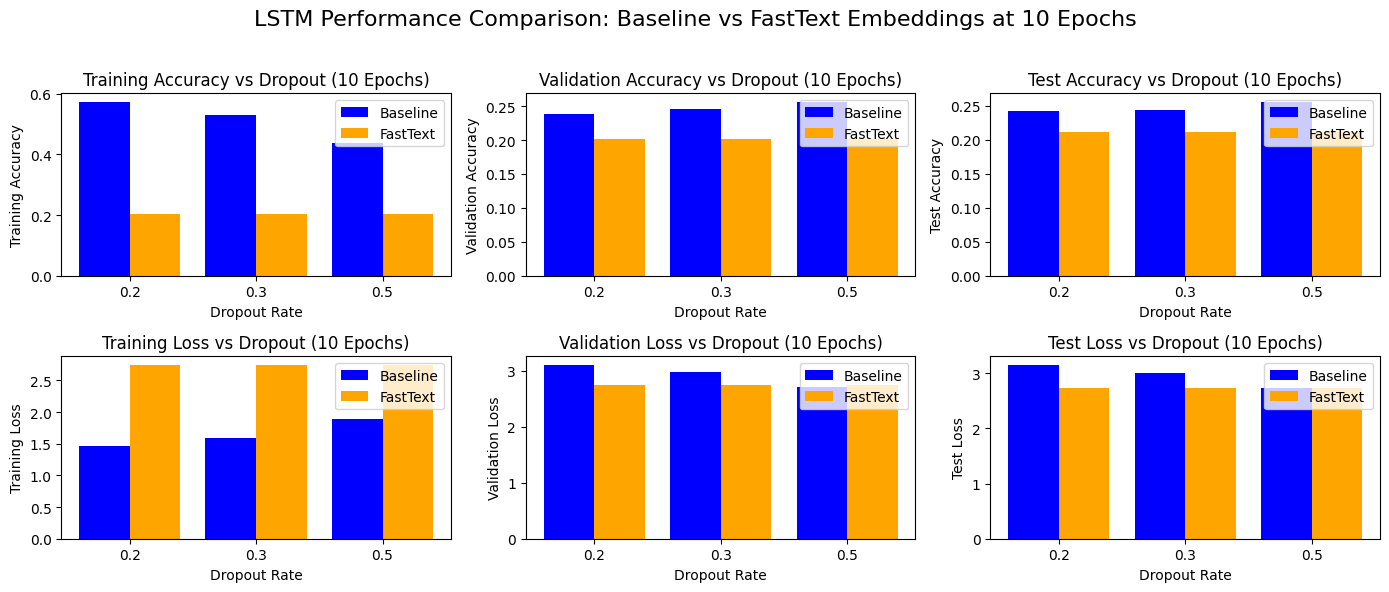

In [49]:
# Make plot figure
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

# First plot for training accuracy vs dropout rate at 10 epochs
axs[0, 0].set_title("Training Accuracy vs Dropout (10 Epochs)")
axs[0, 0].set_xlabel("Dropout Rate")
axs[0, 0].set_ylabel("Training Accuracy")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	trainingAccuracy_baseline = baselineLstmResultsDict[10][dropoutRate]['train']['accuracy']
	trainingAccuracy_fastText = fastTextLstmResultsDict[10][dropoutRate]['train']['accuracy']
	axs[0, 0].bar(x=i - 0.2, height=trainingAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 0].bar(x=i + 0.2, height=trainingAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 0].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[0, 0].legend()

# Second plot for validation accuracy vs dropout rate at 10 epochs
axs[0, 1].set_title("Validation Accuracy vs Dropout (10 Epochs)")
axs[0, 1].set_xlabel("Dropout Rate")
axs[0, 1].set_ylabel("Validation Accuracy")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	validationAccuracy_baseline = baselineLstmResultsDict[10][dropoutRate]['validation']['accuracy']
	validationAccuracy_fastText = fastTextLstmResultsDict[10][dropoutRate]['validation']['accuracy']
	axs[0, 1].bar(x=i - 0.2, height=validationAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 1].bar(x=i + 0.2, height=validationAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 1].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[0, 1].legend()

# Third plot for test accuracy vs dropout rate at 10 epochs
axs[0, 2].set_title("Test Accuracy vs Dropout (10 Epochs)")
axs[0, 2].set_xlabel("Dropout Rate")
axs[0, 2].set_ylabel("Test Accuracy")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	testAccuracy_baseline = baselineLstmResultsDict[10][dropoutRate]['test']['accuracy']
	testAccuracy_fastText = fastTextLstmResultsDict[10][dropoutRate]['test']['accuracy']
	axs[0, 2].bar(x=i - 0.2, height=testAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 2].bar(x=i + 0.2, height=testAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 2].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[0, 2].legend()

# Fourth plot for training loss vs dropout rate at 10 epochs
axs[1, 0].set_title("Training Loss vs Dropout (10 Epochs)")
axs[1, 0].set_xlabel("Dropout Rate")
axs[1, 0].set_ylabel("Training Loss")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	trainingLoss_baseline = baselineLstmResultsDict[10][dropoutRate]['train']['loss']
	trainingLoss_fastText = fastTextLstmResultsDict[10][dropoutRate]['train']['loss']
	axs[1, 0].bar(x=i - 0.2, height=trainingLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 0].bar(x=i + 0.2, height=trainingLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 0].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[1, 0].legend()

# Fifth plot for validation loss vs dropout rate at 10 epochs
axs[1, 1].set_title("Validation Loss vs Dropout (10 Epochs)")
axs[1, 1].set_xlabel("Dropout Rate")
axs[1, 1].set_ylabel("Validation Loss")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	validationLoss_baseline = baselineLstmResultsDict[10][dropoutRate]['validation']['loss']
	validationLoss_fastText = fastTextLstmResultsDict[10][dropoutRate]['validation']['loss']
	axs[1, 1].bar(x=i - 0.2, height=validationLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 1].bar(x=i + 0.2, height=validationLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 1].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[1, 1].legend()

# Sixth plot for test loss vs dropout rate at 10 epochs
axs[1, 2].set_title("Test Loss vs Dropout (10 Epochs)")
axs[1, 2].set_xlabel("Dropout Rate")
axs[1, 2].set_ylabel("Test Loss")
for i, dropoutRate in enumerate(dropoutRatesToTry):
	testLoss_baseline = baselineLstmResultsDict[10][dropoutRate]['test']['loss']
	testLoss_fastText = fastTextLstmResultsDict[10][dropoutRate]['test']['loss']
	axs[1, 2].bar(x=i - 0.2, height=testLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 2].bar(x=i + 0.2, height=testLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 2].set_xticks(ticks=range(len(dropoutRatesToTry)), labels=dropoutRatesToTry)
axs[1, 2].legend()

# Adjust layout with padding space above for titles
fig.suptitle("LSTM Performance Comparison: Baseline vs FastText Embeddings at 10 Epochs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

#### Graph Comparisons (0.30 dropout rate)

This section will produce some graphs for comparing the baseline/fasttext lstms across hyperparameter configurations. We will hold 0.30 dropout rate constant since it appears the best in the above table.

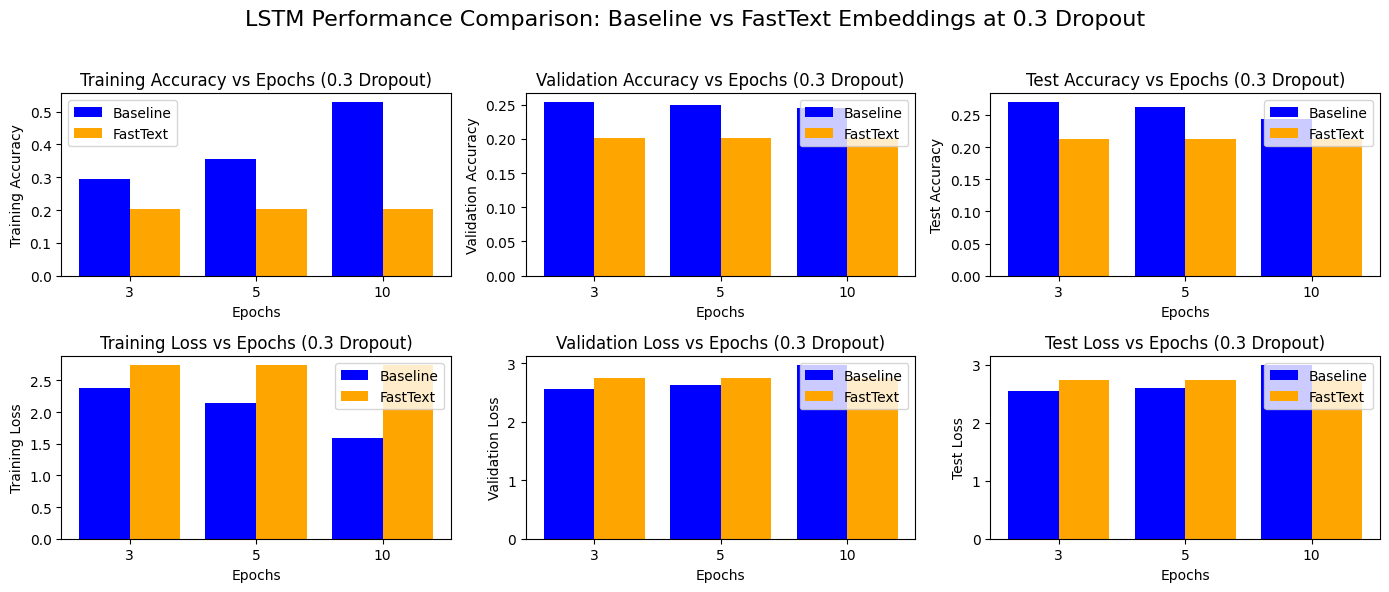

In [51]:
# Make plot figure
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

# First plot for training accuracy vs epochs at 0.3 dropout rate
axs[0, 0].set_title("Training Accuracy vs Epochs (0.3 Dropout)")
axs[0, 0].set_xlabel("Epochs")
axs[0, 0].set_ylabel("Training Accuracy")
for i, epoch in enumerate(epochsToTry):
	trainingAccuracy_baseline = baselineLstmResultsDict[epoch][0.3]['train']['accuracy']
	trainingAccuracy_fastText = fastTextLstmResultsDict[epoch][0.3]['train']['accuracy']
	axs[0, 0].bar(x=i - 0.2, height=trainingAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 0].bar(x=i + 0.2, height=trainingAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 0].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[0, 0].legend()

# Second plot for validation accuracy vs epochs at 0.3 dropout rate
axs[0, 1].set_title("Validation Accuracy vs Epochs (0.3 Dropout)")
axs[0, 1].set_xlabel("Epochs")
axs[0, 1].set_ylabel("Validation Accuracy")
for i, epoch in enumerate(epochsToTry):
	validationAccuracy_baseline = baselineLstmResultsDict[epoch][0.3]['validation']['accuracy']
	validationAccuracy_fastText = fastTextLstmResultsDict[epoch][0.3]['validation']['accuracy']
	axs[0, 1].bar(x=i - 0.2, height=validationAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 1].bar(x=i + 0.2, height=validationAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 1].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[0, 1].legend()

# Third plot for test accuracy vs epochs at 0.3 dropout rate
axs[0, 2].set_title("Test Accuracy vs Epochs (0.3 Dropout)")
axs[0, 2].set_xlabel("Epochs")
axs[0, 2].set_ylabel("Test Accuracy")
for i, epoch in enumerate(epochsToTry):
	testAccuracy_baseline = baselineLstmResultsDict[epoch][0.3]['test']['accuracy']
	testAccuracy_fastText = fastTextLstmResultsDict[epoch][0.3]['test']['accuracy']
	axs[0, 2].bar(x=i - 0.2, height=testAccuracy_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[0, 2].bar(x=i + 0.2, height=testAccuracy_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[0, 2].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[0, 2].legend()

# Fourth plot for training loss vs epochs at 0.3 dropout rate
axs[1, 0].set_title("Training Loss vs Epochs (0.3 Dropout)")
axs[1, 0].set_xlabel("Epochs")
axs[1, 0].set_ylabel("Training Loss")
for i, epoch in enumerate(epochsToTry):
	trainingLoss_baseline = baselineLstmResultsDict[epoch][0.3]['train']['loss']
	trainingLoss_fastText = fastTextLstmResultsDict[epoch][0.3]['train']['loss']
	axs[1, 0].bar(x=i - 0.2, height=trainingLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 0].bar(x=i + 0.2, height=trainingLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 0].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[1, 0].legend()

# Fifth plot for validation loss vs epochs at 0.3 dropout rate
axs[1, 1].set_title("Validation Loss vs Epochs (0.3 Dropout)")
axs[1, 1].set_xlabel("Epochs")
axs[1, 1].set_ylabel("Validation Loss")
for i, epoch in enumerate(epochsToTry):
	validationLoss_baseline = baselineLstmResultsDict[epoch][0.3]['validation']['loss']
	validationLoss_fastText = fastTextLstmResultsDict[epoch][0.3]['validation']['loss']
	axs[1, 1].bar(x=i - 0.2, height=validationLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 1].bar(x=i + 0.2, height=validationLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 1].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[1, 1].legend()

# Sixth plot for test loss vs epochs at 0.3 dropout rate
axs[1, 2].set_title("Test Loss vs Epochs (0.3 Dropout)")
axs[1, 2].set_xlabel("Epochs")
axs[1, 2].set_ylabel("Test Loss")
for i, epoch in enumerate(epochsToTry):
	testLoss_baseline = baselineLstmResultsDict[epoch][0.3]['test']['loss']
	testLoss_fastText = fastTextLstmResultsDict[epoch][0.3]['test']['loss']
	axs[1, 2].bar(x=i - 0.2, height=testLoss_baseline, width=0.4, label="Baseline" if i == 0 else "", color='blue')
	axs[1, 2].bar(x=i + 0.2, height=testLoss_fastText, width=0.4, label="FastText" if i == 0 else "", color='orange')
axs[1, 2].set_xticks(ticks=range(len(epochsToTry)), labels=epochsToTry)
axs[1, 2].legend()

# Adjust layout with padding space above for titles
fig.suptitle("LSTM Performance Comparison: Baseline vs FastText Embeddings at 0.3 Dropout", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])